In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
# Replace with your actual file paths
train_path = '/content/UNSW_NB15_training-set.csv'
test_path = '/content/UNSW_NB15_testing-set.csv'

df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)
df_all = pd.concat([df_train, df_test], axis=0).reset_index(drop=True)
print(df_all.shape)

(257673, 45)


In [6]:
print(df_all.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257673 entries, 0 to 257672
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 257673 non-null  int64  
 1   dur                257673 non-null  float64
 2   proto              257673 non-null  object 
 3   service            257673 non-null  object 
 4   state              257673 non-null  object 
 5   spkts              257673 non-null  int64  
 6   dpkts              257673 non-null  int64  
 7   sbytes             257673 non-null  int64  
 8   dbytes             257673 non-null  int64  
 9   rate               257673 non-null  float64
 10  sttl               257673 non-null  int64  
 11  dttl               257673 non-null  int64  
 12  sload              257673 non-null  float64
 13  dload              257673 non-null  float64
 14  sloss              257673 non-null  int64  
 15  dloss              257673 non-null  int64  
 16  si

In [7]:
print(df_all.describe())

                  id            dur          spkts          dpkts  \
count  257673.000000  257673.000000  257673.000000  257673.000000   
mean    72811.823858       1.246715      19.777144      18.514703   
std     48929.917641       5.974305     135.947152     111.985965   
min         1.000000       0.000000       1.000000       0.000000   
25%     32210.000000       0.000008       2.000000       0.000000   
50%     64419.000000       0.004285       4.000000       2.000000   
75%    110923.000000       0.685777      12.000000      10.000000   
max    175341.000000      59.999989   10646.000000   11018.000000   

             sbytes        dbytes          rate           sttl           dttl  \
count  2.576730e+05  2.576730e+05  2.576730e+05  257673.000000  257673.000000   
mean   8.572952e+03  1.438729e+04  9.125391e+04     180.000931      84.754957   
std    1.737739e+05  1.461993e+05  1.603446e+05     102.488268     112.762131   
min    2.400000e+01  0.000000e+00  0.000000e+00       

In [8]:
print(df_all.columns)

Index(['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')


In [9]:
print(df_all['label'].value_counts())
print(df_all['attack_cat'].value_counts())  # Optional: for multiclass

label
1    164673
0     93000
Name: count, dtype: int64
attack_cat
Normal            93000
Generic           58871
Exploits          44525
Fuzzers           24246
DoS               16353
Reconnaissance    13987
Analysis           2677
Backdoor           2329
Shellcode          1511
Worms               174
Name: count, dtype: int64


In [10]:
cols_to_drop = ['id', 'attack_cat', 'label']
X_all = df_all.drop(columns=cols_to_drop)
y_all = df_all['label']


In [11]:
df_all['state'].unique()

array(['FIN', 'INT', 'CON', 'ECO', 'REQ', 'RST', 'PAR', 'URN', 'no',
       'ACC', 'CLO'], dtype=object)

In [12]:
df_train['service'].unique()

array(['-', 'ftp', 'smtp', 'snmp', 'http', 'ftp-data', 'dns', 'ssh',
       'radius', 'pop3', 'dhcp', 'ssl', 'irc'], dtype=object)

In [13]:
df_train['proto'].unique()

array(['tcp', 'udp', 'arp', 'ospf', 'icmp', 'igmp', 'rtp', 'ddp',
       'ipv6-frag', 'cftp', 'wsn', 'pvp', 'wb-expak', 'mtp', 'pri-enc',
       'sat-mon', 'cphb', 'sun-nd', 'iso-ip', 'xtp', 'il', 'unas',
       'mfe-nsp', '3pc', 'ipv6-route', 'idrp', 'bna', 'swipe',
       'kryptolan', 'cpnx', 'rsvp', 'wb-mon', 'vmtp', 'ib', 'dgp',
       'eigrp', 'ax.25', 'gmtp', 'pnni', 'sep', 'pgm', 'idpr-cmtp',
       'zero', 'rvd', 'mobile', 'narp', 'fc', 'pipe', 'ipcomp', 'ipv6-no',
       'sat-expak', 'ipv6-opts', 'snp', 'ipcv', 'br-sat-mon', 'ttp',
       'tcf', 'nsfnet-igp', 'sprite-rpc', 'aes-sp3-d', 'sccopmce', 'sctp',
       'qnx', 'scps', 'etherip', 'aris', 'pim', 'compaq-peer', 'vrrp',
       'iatp', 'stp', 'l2tp', 'srp', 'sm', 'isis', 'smp', 'fire', 'ptp',
       'crtp', 'sps', 'merit-inp', 'idpr', 'skip', 'any', 'larp', 'ipip',
       'micp', 'encap', 'ifmp', 'tp++', 'a/n', 'ipv6', 'i-nlsp',
       'ipx-n-ip', 'sdrp', 'tlsp', 'gre', 'mhrp', 'ddx', 'ippc', 'visa',
       'secure-vmtp', 

In [14]:
service_categories =['-', 'ftp', 'smtp', 'snmp', 'http', 'ftp-data', 'dns', 'ssh',
       'radius', 'pop3', 'dhcp', 'ssl', 'irc']

proto_categories = ['tcp', 'udp', 'arp', 'ospf', 'icmp', 'igmp', 'rtp', 'ddp',
       'ipv6-frag', 'cftp', 'wsn', 'pvp', 'wb-expak', 'mtp', 'pri-enc',
       'sat-mon', 'cphb', 'sun-nd', 'iso-ip', 'xtp', 'il', 'unas',
       'mfe-nsp', '3pc', 'ipv6-route', 'idrp', 'bna', 'swipe',
       'kryptolan', 'cpnx', 'rsvp', 'wb-mon', 'vmtp', 'ib', 'dgp',
       'eigrp', 'ax.25', 'gmtp', 'pnni', 'sep', 'pgm', 'idpr-cmtp',
       'zero', 'rvd', 'mobile', 'narp', 'fc', 'pipe', 'ipcomp', 'ipv6-no',
       'sat-expak', 'ipv6-opts', 'snp', 'ipcv', 'br-sat-mon', 'ttp',
       'tcf', 'nsfnet-igp', 'sprite-rpc', 'aes-sp3-d', 'sccopmce', 'sctp',
       'qnx', 'scps', 'etherip', 'aris', 'pim', 'compaq-peer', 'vrrp',
       'iatp', 'stp', 'l2tp', 'srp', 'sm', 'isis', 'smp', 'fire', 'ptp',
       'crtp', 'sps', 'merit-inp', 'idpr', 'skip', 'any', 'larp', 'ipip',
       'micp', 'encap', 'ifmp', 'tp++', 'a/n', 'ipv6', 'i-nlsp',
       'ipx-n-ip', 'sdrp', 'tlsp', 'gre', 'mhrp', 'ddx', 'ippc', 'visa',
       'secure-vmtp', 'uti', 'vines', 'crudp', 'iplt', 'ggp', 'ip',
       'ipnip', 'st2', 'argus', 'bbn-rcc', 'egp', 'emcon', 'igp', 'nvp',
       'pup', 'xnet', 'chaos', 'mux', 'dcn', 'hmp', 'prm', 'trunk-1',
       'xns-idp', 'leaf-1', 'leaf-2', 'rdp', 'irtp', 'iso-tp4', 'netblt',
       'trunk-2', 'cbt']
state_categories = ['no', 'FIN', 'INT', 'CON', 'ECO', 'REQ', 'RST', 'PAR', 'URN', 'CLO', 'ACC']
categorical_cols = ['proto', 'service', 'state']

In [15]:
all_categories = [proto_categories, service_categories, state_categories]

In [16]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder(categories=all_categories)
X_all[categorical_cols] = oe.fit_transform(X_all[categorical_cols])

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_all_scaled = scaler.fit_transform(X_all)

In [18]:
print("All features scaled, shape:", X_all_scaled.shape)

All features scaled, shape: (257673, 42)


In [19]:
print("All features scaled, shape:", X_all_scaled.shape)

All features scaled, shape: (257673, 42)


In [20]:
print("Unique values per categorical after encoding:")
for col in categorical_cols:
    print(col, sorted(X_all[col].unique()))

Unique values per categorical after encoding:
proto [np.float64(0.0), np.float64(1.0), np.float64(2.0), np.float64(3.0), np.float64(4.0), np.float64(5.0), np.float64(6.0), np.float64(7.0), np.float64(8.0), np.float64(9.0), np.float64(10.0), np.float64(11.0), np.float64(12.0), np.float64(13.0), np.float64(14.0), np.float64(15.0), np.float64(16.0), np.float64(17.0), np.float64(18.0), np.float64(19.0), np.float64(20.0), np.float64(21.0), np.float64(22.0), np.float64(23.0), np.float64(24.0), np.float64(25.0), np.float64(26.0), np.float64(27.0), np.float64(28.0), np.float64(29.0), np.float64(30.0), np.float64(31.0), np.float64(32.0), np.float64(33.0), np.float64(34.0), np.float64(35.0), np.float64(36.0), np.float64(37.0), np.float64(38.0), np.float64(39.0), np.float64(40.0), np.float64(41.0), np.float64(42.0), np.float64(43.0), np.float64(44.0), np.float64(45.0), np.float64(46.0), np.float64(47.0), np.float64(48.0), np.float64(49.0), np.float64(50.0), np.float64(51.0), np.float64(52.0), np.

In [21]:
X_all.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports
0,0.121478,0.0,0.0,1.0,6,4,258,172,74.087490,252,...,1,1,1,1,0,0,0,1,1,0
1,0.649902,0.0,0.0,1.0,14,38,734,42014,78.473372,62,...,1,1,1,2,0,0,0,1,6,0
2,1.623129,0.0,0.0,1.0,8,16,364,13186,14.170161,62,...,2,1,1,3,0,0,0,2,6,0
3,1.681642,0.0,1.0,1.0,12,12,628,770,13.677108,62,...,2,1,1,3,1,1,0,2,1,0
4,0.449454,0.0,0.0,1.0,10,6,534,268,33.373826,254,...,2,2,1,40,0,0,0,2,39,0


In [22]:
X_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257673 entries, 0 to 257672
Data columns (total 42 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   dur                257673 non-null  float64
 1   proto              257673 non-null  float64
 2   service            257673 non-null  float64
 3   state              257673 non-null  float64
 4   spkts              257673 non-null  int64  
 5   dpkts              257673 non-null  int64  
 6   sbytes             257673 non-null  int64  
 7   dbytes             257673 non-null  int64  
 8   rate               257673 non-null  float64
 9   sttl               257673 non-null  int64  
 10  dttl               257673 non-null  int64  
 11  sload              257673 non-null  float64
 12  dload              257673 non-null  float64
 13  sloss              257673 non-null  int64  
 14  dloss              257673 non-null  int64  
 15  sinpkt             257673 non-null  float64
 16  di

In [23]:
from sklearn.model_selection import train_test_split

# Let's say you want 70% training, 30% testing:
X_train, X_test, y_train, y_test = train_test_split(
    X_all_scaled,
    y_all,
    test_size=0.2,
    random_state=42,
    stratify=y_all    # <--- THIS ensures balanced labels
)

# Confirm balance:
import numpy as np

print("Train label distribution:", np.bincount(y_train))
print("Test label distribution:", np.bincount(y_test))
print("Total samples:", len(y_all))
print("Train:", len(y_train), "Test:", len(y_test))

Train label distribution: [ 74400 131738]
Test label distribution: [18600 32935]
Total samples: 257673
Train: 206138 Test: 51535


In [24]:
# Save
np.save('X_train.npy', X_train)
np.save('X_test.npy', X_test)
np.save('y_train.npy', y_train)
np.save('y_test.npy', y_test)

In [25]:
import joblib
# Save
joblib.dump(X_train, 'X_train.joblib')
joblib.dump(X_test, 'X_test.joblib')
joblib.dump(y_train, 'y_train.joblib')
joblib.dump(y_test, 'y_test.joblib')

['y_test.joblib']

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import joblib

# Train
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)

# Save model
joblib.dump(rf, 'rf_model.joblib')

['rf_model.joblib']

In [27]:
# Predict
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:, 1]

In [28]:
# Evaluate
print("Random Forest Results")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=4))
print("ROC AUC:", roc_auc_score(y_test, y_proba))

Random Forest Results
[[17455  1145]
 [ 1278 31657]]
              precision    recall  f1-score   support

           0     0.9318    0.9384    0.9351     18600
           1     0.9651    0.9612    0.9631     32935

    accuracy                         0.9530     51535
   macro avg     0.9484    0.9498    0.9491     51535
weighted avg     0.9531    0.9530    0.9530     51535

ROC AUC: 0.9924736659533033


In [29]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[17455  1145]
 [ 1278 31657]]


In [30]:
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, roc_auc_score
)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=4))
print("ROC AUC:", roc_auc_score(y_test, y_proba))

Accuracy: 0.9529834093334627
Confusion Matrix:
 [[17455  1145]
 [ 1278 31657]]
              precision    recall  f1-score   support

           0     0.9318    0.9384    0.9351     18600
           1     0.9651    0.9612    0.9631     32935

    accuracy                         0.9530     51535
   macro avg     0.9484    0.9498    0.9491     51535
weighted avg     0.9531    0.9530    0.9530     51535

ROC AUC: 0.9924736659533033


In [31]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
knn.fit(X_train, y_train)

# Save model
joblib.dump(knn, 'knn_model.joblib')

['knn_model.joblib']

In [32]:
# Predict
y_pred_knn = knn.predict(X_test)
y_proba_knn = knn.predict_proba(X_test)[:, 1]

In [33]:
# Evaluate
print("KNN Results")
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn, digits=4))
print("ROC AUC:", roc_auc_score(y_test, y_proba_knn))
print("Accuracy:", accuracy_score(y_test, y_pred_knn))

KNN Results
[[16520  2080]
 [ 2220 30715]]
              precision    recall  f1-score   support

           0     0.8815    0.8882    0.8848     18600
           1     0.9366    0.9326    0.9346     32935

    accuracy                         0.9166     51535
   macro avg     0.9091    0.9104    0.9097     51535
weighted avg     0.9167    0.9166    0.9166     51535

ROC AUC: 0.9738002982414042
Accuracy: 0.9165615601047832


In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
# Reshape data for LSTM (samples, time steps, features)
X_train_lstm = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Build LSTM model
lstm_model = Sequential([
    LSTM(128, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile model
lstm_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

print("\nLSTM Model Summary:")
lstm_model.summary()

# Train LSTM model
print("\nTraining LSTM model...")
history = lstm_model.fit(
    X_train_lstm,
    y_train,
    epochs=10,
    batch_size=1024,
    validation_split=0.2,
    verbose=1
)

# Predictions
lstm_y_proba = lstm_model.predict(X_test_lstm).flatten()
lstm_y_pred = (lstm_y_proba > 0.5).astype(int)

# Evaluation
print("\nLSTM Results:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, lstm_y_pred))
print("\nClassification Report:")
print(classification_report(y_test, lstm_y_pred, digits=4))
print(f"ROC AUC: {roc_auc_score(y_test, lstm_y_proba):.6f}")

# Save model
lstm_model.save('lstm_model.keras')


LSTM Model Summary:


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 128)            │        87,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 95,873 (374.50 KB)

 Trainable params: 95,873 (374.50 KB)

 Non-trainable params: 0 (0.00 B)


Training LSTM model...
Epoch 1/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.8171 - loss: 0.4078 - val_accuracy: 0.9025 - val_loss: 0.1843
Epoch 2/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.9038 - loss: 0.1825 - val_accuracy: 0.9120 - val_loss: 0.1658
Epoch 3/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.9105 - loss: 0.1683 - val_accuracy: 0.9143 - val_loss: 0.1618
Epoch 4/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.9119 - loss: 0.1669 - val_accuracy: 0.9178 - val_loss: 0.1566
Epoch 5/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.9153 - loss: 0.1606 - val_accuracy: 0.9202 - val_loss: 0.1544
Epoch 6/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.9165 - loss: 0.1578 - val_accuracy: 0.9205 - val_loss: 0.1525
Epoch 7/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.9189 - loss: 0.1561 - val_accuracy: 0.9223 - val_loss: 0.1502
Epoch 8/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.9197 -

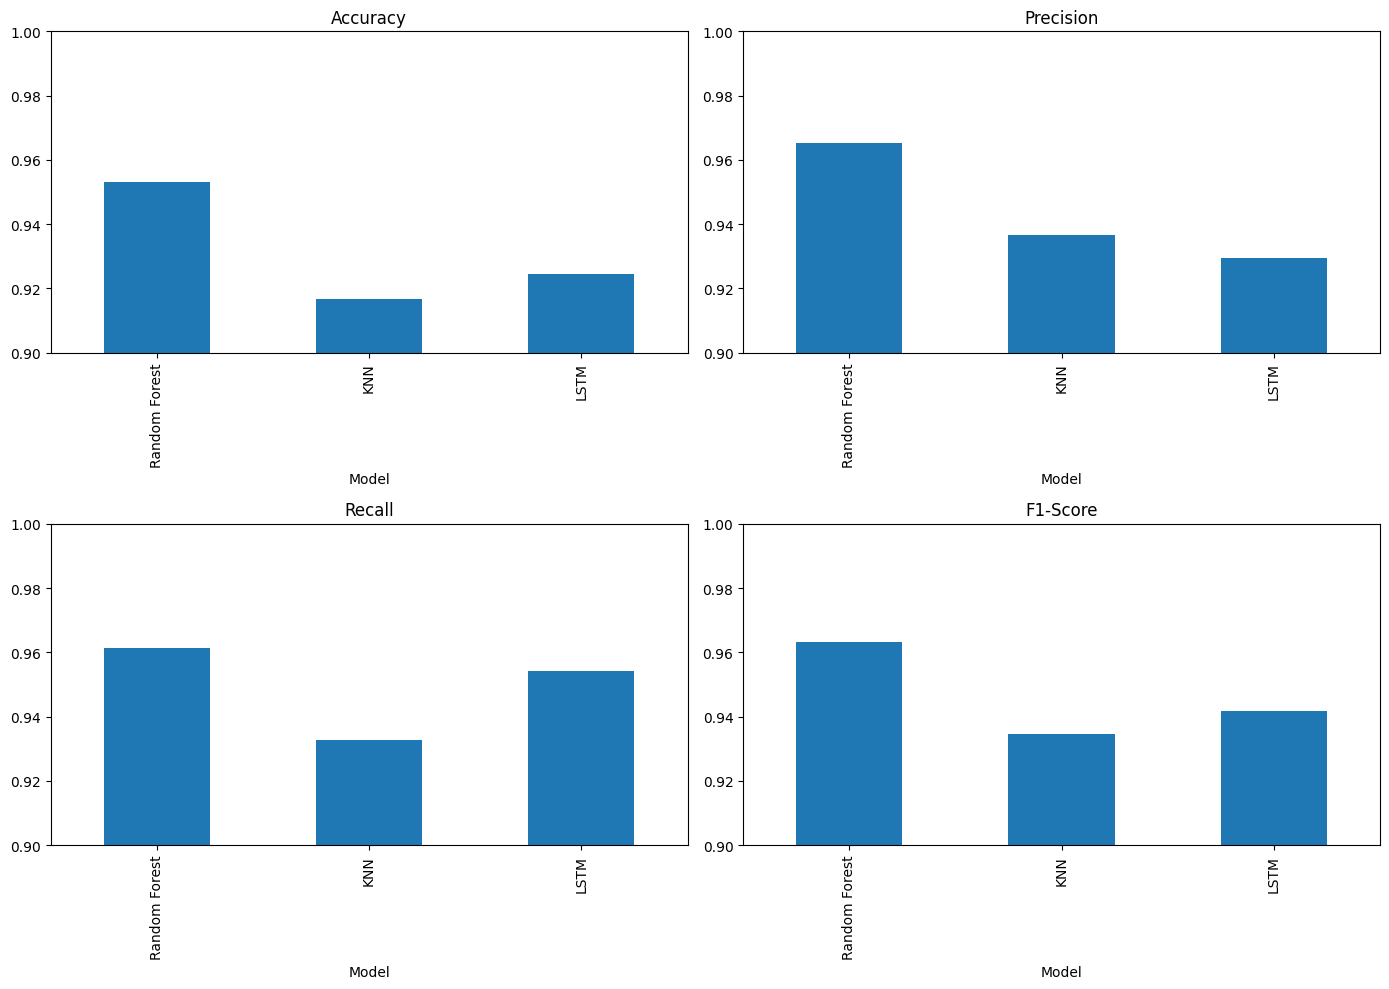

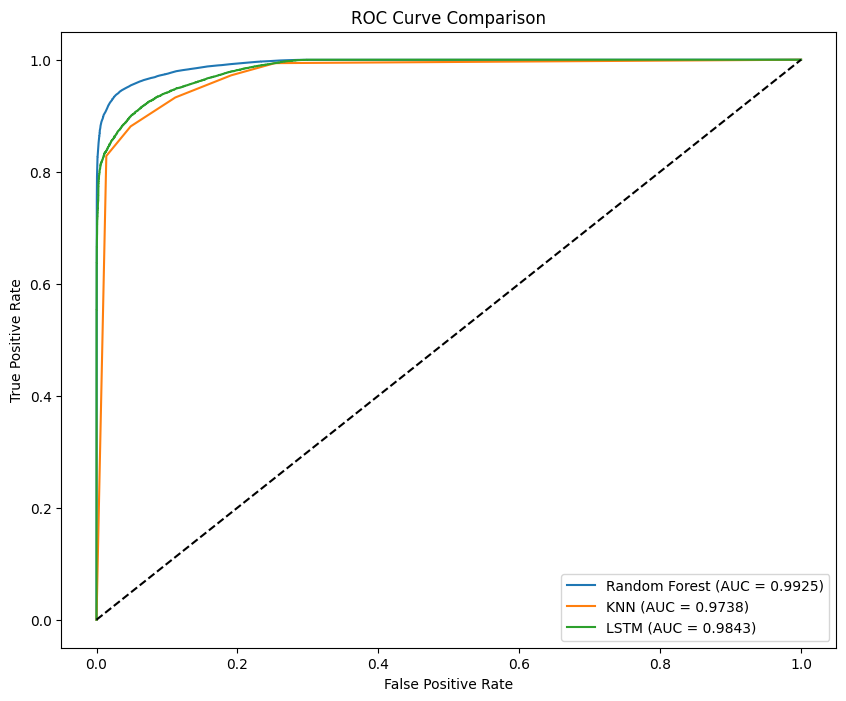

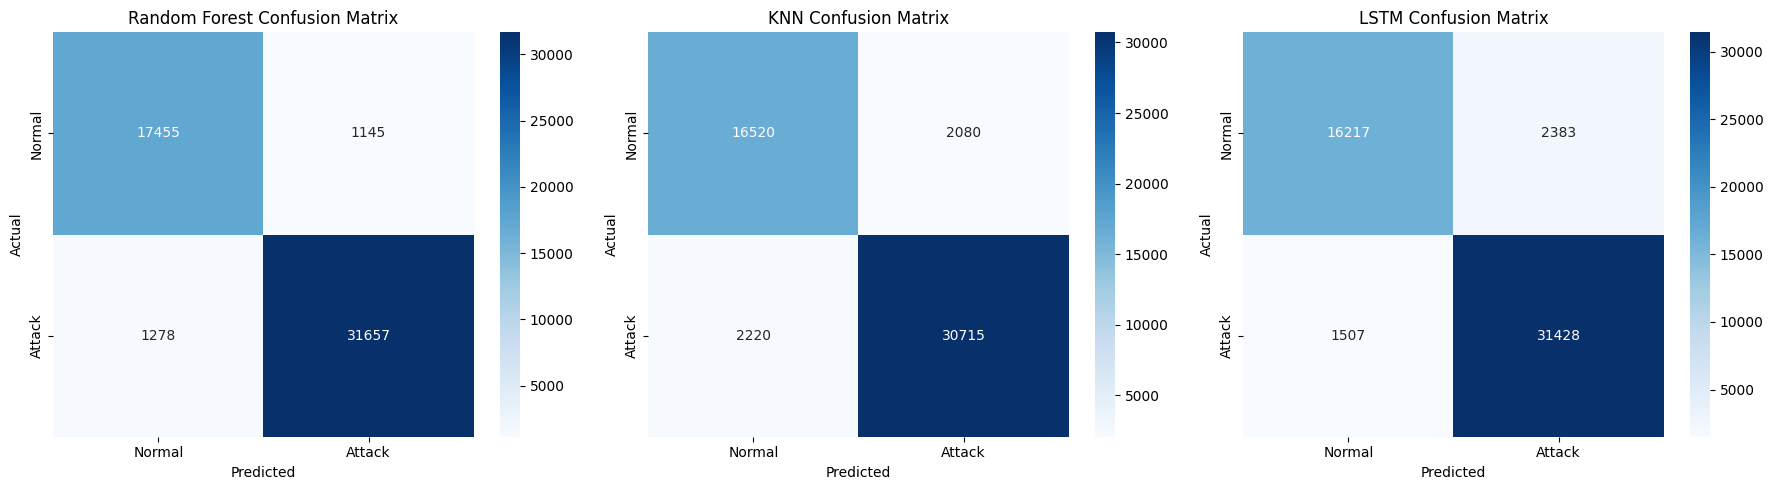


Model Performance Comparison:
               Accuracy  Precision    Recall  F1-Score   ROC AUC
Model                                                           
Random Forest  0.952983   0.965094  0.961196  0.963141  0.992474
KNN            0.916562   0.936576  0.932595  0.934581  0.973800
LSTM           0.924517   0.929520  0.954243  0.941719  0.984290


In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, roc_curve

# Load KNN model
knn = joblib.load('knn_model.joblib')

# Predict
y_pred_knn = knn.predict(X_test)
y_proba_knn = knn.predict_proba(X_test)[:, 1]

# Load Random Forest results
rf = joblib.load('rf_model.joblib')
rf_y_pred = rf.predict(X_test)
rf_y_proba = rf.predict_proba(X_test)[:, 1]

# Create comparison dataframe
results = {
    'Model': ['Random Forest', 'KNN', 'LSTM'],
    'Accuracy': [
        accuracy_score(y_test, rf_y_pred),
        accuracy_score(y_test, y_pred_knn),
        accuracy_score(y_test, lstm_y_pred)
    ],
    'Precision': [
        precision_score(y_test, rf_y_pred),
        precision_score(y_test, y_pred_knn),
        precision_score(y_test, lstm_y_pred)
    ],
    'Recall': [
        recall_score(y_test, rf_y_pred),
        recall_score(y_test, y_pred_knn),
        recall_score(y_test, lstm_y_pred)
    ],
    'F1-Score': [
        f1_score(y_test, rf_y_pred),
        f1_score(y_test, y_pred_knn),
        f1_score(y_test, lstm_y_pred)
    ],
    'ROC AUC': [
        roc_auc_score(y_test, rf_y_proba),
        roc_auc_score(y_test, y_proba_knn),
        roc_auc_score(y_test, lstm_y_proba)
    ]
}

results_df = pd.DataFrame(results).set_index('Model')

# Plot metrics comparison
plt.figure(figsize=(14, 10))
plt.subplot(2, 2, 1)
results_df['Accuracy'].plot(kind='bar', title='Accuracy')
plt.ylim(0.9, 1.0)

plt.subplot(2, 2, 2)
results_df['Precision'].plot(kind='bar', title='Precision')
plt.ylim(0.9, 1.0)

plt.subplot(2, 2, 3)
results_df['Recall'].plot(kind='bar', title='Recall')
plt.ylim(0.9, 1.0)

plt.subplot(2, 2, 4)
results_df['F1-Score'].plot(kind='bar', title='F1-Score')
plt.ylim(0.9, 1.0)

plt.tight_layout()
plt.savefig('metrics_comparison.png')
plt.show()

# ROC Curve comparison
plt.figure(figsize=(10, 8))

# Calculate ROC curves
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_y_proba)
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_proba_knn)
fpr_lstm, tpr_lstm, _ = roc_curve(y_test, lstm_y_proba)

# Plot ROC curves
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_score(y_test, rf_y_proba):.4f})')
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {roc_auc_score(y_test, y_proba_knn):.4f})')
plt.plot(fpr_lstm, tpr_lstm, label=f'LSTM (AUC = {roc_auc_score(y_test, lstm_y_proba):.4f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.savefig('roc_comparison.png')
plt.show()

# Confusion matrices
models = {
    'Random Forest': rf_y_pred,
    'KNN': y_pred_knn,
    'LSTM': lstm_y_pred
}

plt.figure(figsize=(18, 5))
for i, (name, preds) in enumerate(models.items(), 1):
    plt.subplot(1, 3, i)
    cm = confusion_matrix(y_test, preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Normal', 'Attack'],
                yticklabels=['Normal', 'Attack'])
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

plt.tight_layout()
plt.savefig('confusion_matrices.png')
plt.show()

# Print final comparison table
print("\nModel Performance Comparison:")
print(results_df)

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import tensorflow as tf # Import tensorflow for LearningRateScheduler and AUC metric
from tensorflow.keras.callbacks import EarlyStopping

# Improved LSTM model
lstm_model = Sequential([
    LSTM(256, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Add learning rate scheduler
def lr_scheduler(epoch, lr):
    if epoch > 5 and epoch % 2 == 0:
        return lr * 0.9
    return lr

callbacks = [
    EarlyStopping(patience=3, restore_best_weights=True),
    tf.keras.callbacks.LearningRateScheduler(lr_scheduler)
]

lstm_model.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC()]
)

history = lstm_model.fit(
    X_train_lstm,
    y_train,
    epochs=20,
    batch_size=2048,
    validation_split=0.2,
    callbacks=callbacks,
    verbose=1
)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


81/81 ━━━━━━━━━━━━━━━━━━━━ 14s 130ms/step - accuracy: 0.7663 - auc: 0.8512 - loss: 0.5179 - val_accuracy: 0.8918 - val_auc: 0.9551 - val_loss: 0.2467 - learning_rate: 5.0000e-04
Epoch 2/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 11s 133ms/step - accuracy: 0.8941 - auc: 0.9581 - loss: 0.2326 - val_accuracy: 0.9009 - val_auc: 0.9722 - val_loss: 0.1918 - learning_rate: 5.0000e-04
Epoch 3/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 11s 137ms/step - accuracy: 0.9006 - auc: 0.9711 - loss: 0.1937 - val_accuracy: 0.9051 - val_auc: 0.9756 - val_loss: 0.1786 - learning_rate: 5.0000e-04
Epoch 4/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 20s 131ms/step - accuracy: 0.9044 - auc: 0.9742 - loss: 0.1827 - val_accuracy: 0.9088 - val_auc: 0.9776 - val_loss: 0.1706 - learning_rate: 5.0000e-04
Epoch 5/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 19s 118ms/step - accuracy: 0.9074 - auc: 0.9766 - loss: 0.1743 - val_accuracy: 0.9112 - val_auc: 0.9787 - val_loss: 0.1666 - learning_rate: 5.0000e-04
Epoch 6/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 11s 138ms/step - accuracy: 0

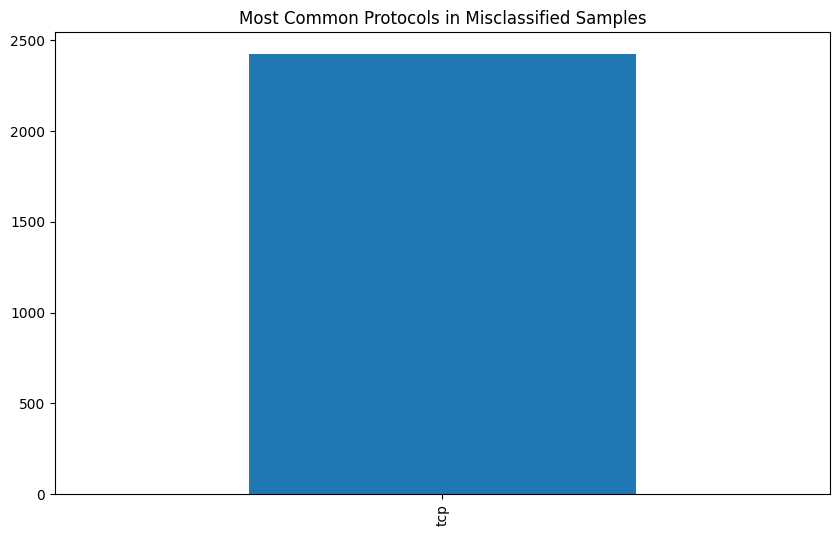

In [37]:
# Get misclassified samples
misclassified = np.where(y_test != rf_y_pred)[0]
misclassified_samples = X_test[misclassified]

# Analyze most common protocols in errors
proto_encoder = oe.categories_[0]
misclassified_protos = [proto_encoder[int(x)] for x in misclassified_samples[:, 1]]  # proto is 2nd feature

plt.figure(figsize=(10, 6))
pd.Series(misclassified_protos).value_counts()[:10].plot(kind='bar')
plt.title("Most Common Protocols in Misclassified Samples")
plt.savefig('error_analysis_protocols.png')
plt.show()

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


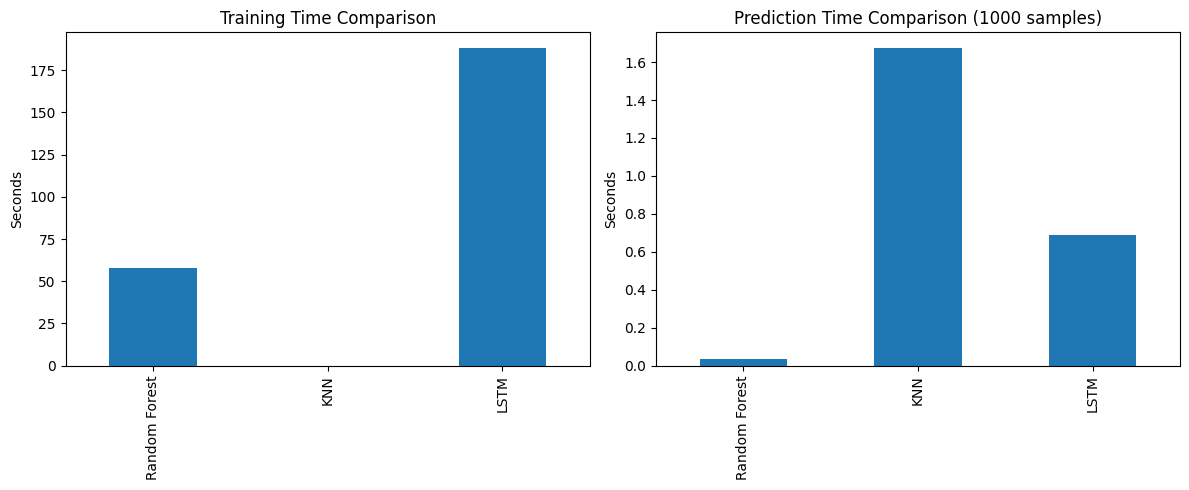

In [38]:
import time

# Training time comparison
models = {
    'Random Forest': rf,
    'KNN': knn,
    'LSTM': lstm_model
}

training_times = {}
prediction_times = {}

for name, model in models.items():
    start = time.time()
    if name == 'LSTM':
        model.fit(X_train_lstm, y_train, epochs=10, batch_size=1024, verbose=0)
    else:
        model.fit(X_train, y_train)
    training_times[name] = time.time() - start

    start = time.time()
    if name == 'LSTM':
        model.predict(X_test_lstm[:1000])  # test on subset for LSTM
    else:
        model.predict(X_test[:1000])
    prediction_times[name] = time.time() - start

# Plot timing comparison
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
pd.Series(training_times).plot(kind='bar')
plt.title("Training Time Comparison")
plt.ylabel("Seconds")

plt.subplot(1, 2, 2)
pd.Series(prediction_times).plot(kind='bar')
plt.title("Prediction Time Comparison (1000 samples)")
plt.ylabel("Seconds")

plt.tight_layout()
plt.savefig('timing_comparison.png')
plt.show()